<a href="https://colab.research.google.com/github/HyVeel/eksploracja-danych/blob/main/zaj6/Zadanie_integracja_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [280]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import openpyxl
import numpy as np
from scipy import stats

# Zadanie

Dysponujesz danymi z portalu Our World in Data dotyczącymi:
- Pierwotnej konsumpcji energii
- Emisji CO2 z poszczególnych lat dla różnych krajów

In [281]:
df_primary_energy = pd.read_csv("primary-energy-cons.csv")
df_primary_energy.head()

,Entity,Code,Year,Primary energy consumption (TWh)
0,Afghanistan,AFG,1980,6.337187
1,Afghanistan,AFG,1981,7.289555
2,Afghanistan,AFG,1982,7.889244
3,Afghanistan,AFG,1983,9.882159
4,Afghanistan,AFG,1984,9.929878


In [282]:
df_co2 = pd.read_csv("co2-emissions-per-capita.csv")
df_co2.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.010837
2,Afghanistan,1951,0.011625
3,Afghanistan,1952,0.011468
4,Afghanistan,1953,0.013123


In [283]:
# unique kraje
df_primary_energy["Entity"].unique()

array(['Afghanistan', 'Africa', 'Africa (EI)', 'Africa (EIA)', 'Albania',
       'Algeria', 'American Samoa', 'Angola', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia Pacific (EI)', 'Asia and Oceania (EIA)', 'Australia',
       'Australia and New Zealand (EIA)', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (EI)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic',
       'Central America (EI)', 'Central and South America (EIA)', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'Democratic Republi

## Część 1: Plik CSV
Utwórz plik CSV zawierający połączone dane dla Polski:
- konsumpcja energii pierwotnej
- emisja CO2
- dane z poszczególnych lat

In [284]:
data = pd.merge(df_primary_energy, df_co2, on=["Entity", "Year"], how="inner")

In [285]:
data_pl = data[data["Entity"] == "Poland"].drop(columns=["Entity", "Code"]).sort_values(by="Year").reset_index(drop=True)
data_pl.to_csv("data_pl.csv", index=False)
data_pl.head()

,Year,Primary energy consumption (TWh),Annual CO₂ emissions (per capita)
0,1965,776.05330,7.893703
1,1966,791.17820,7.996349
2,1967,814.29987,8.138128
3,1968,876.36676,8.597721
4,1969,936.06604,9.076116


## Część 2: Plik Excel
Stwórz plik Excel z osobnymi zakładkami dla każdego kraju:
- UE
- USA
- Chiny
- Indie

Każda zakładka powinna zawierać dane o konsumpcji energii i emisji CO2.

In [286]:
countries = ["European Union (27)", "United States", "China", "India"]

wb = openpyxl.Workbook()

for country in countries:
    sheet = wb.create_sheet(title=country)
    df_country = data[data["Entity"] == country]
    df_country = df_country.drop(columns=["Entity", "Code"]).sort_values(by="Year").reset_index(drop=True)

    sheet.append(df_country.columns.tolist())

    for row in df_country.values.tolist():
        sheet.append(row)

wb.save("data_countries.xlsx")

## Część 3: Baza danych SQLite
Utwórz bazę danych SQLite z tabelą zawierającą:
- kraj
- rok
- emisja CO2
- konsumpcja energii

Dane powinny obejmować: Polskę, Niemcy i Hiszpanię.

In [287]:
conn = sqlite3.connect("data.sqlite")

query1 = "DROP TABLE IF EXISTS data;"
query2 = """
    CREATE TABLE data (
        country TEXT,
        year INTEGER,
        energy_consumption REAL,
        co2_emissions REAL
    )
"""

conn.execute(query1)
conn.execute(query2)
conn.commit()

In [288]:
countries = ["Poland", "Germany", "Spain"]

for country in countries:
    df_country = data[data["Entity"] == country]
    df_country = df_country.drop(columns=["Code"]).sort_values(by="Year").reset_index(drop=True)
    stmt = "INSERT INTO data VALUES (?, ?, ?, ?)"
    conn.executemany(stmt, df_country.values.tolist())
    conn.commit()

In [289]:
cursor = conn.execute("SELECT * FROM data")

for row in cursor:
    print(row)

('Poland', 1965, 776.0533, 7.8937035)
('Poland', 1966, 791.1782, 7.996349)
('Poland', 1967, 814.29987, 8.138128)
('Poland', 1968, 876.36676, 8.597721)
('Poland', 1969, 936.06604, 9.076116)
('Poland', 1970, 987.92114, 9.345997)
('Poland', 1971, 1019.14355, 9.547403)
('Poland', 1972, 1074.9188, 9.972351)
('Poland', 1973, 1095.064, 10.067717)
('Poland', 1974, 1131.2563, 10.291654)
('Poland', 1975, 1220.2694, 11.034498)
('Poland', 1976, 1285.5217, 11.608108)
('Poland', 1977, 1340.4155, 12.069676)
('Poland', 1978, 1407.3623, 12.333755)
('Poland', 1979, 1428.2526, 12.519969)
('Poland', 1980, 1495.6301, 13.023452)
('Poland', 1981, 1348.4725, 11.392384)
('Poland', 1982, 1373.0583, 11.618277)
('Poland', 1983, 1379.3741, 11.511654)
('Poland', 1984, 1433.9169, 11.718143)
('Poland', 1985, 1466.4424, 11.948863)
('Poland', 1986, 1507.76, 12.064544)
('Poland', 1987, 1556.6346, 12.311799)
('Poland', 1988, 1526.9053, 11.746565)
('Poland', 1989, 1469.5234, 11.128002)
('Poland', 1990, 1210.3297, 9.897169

## Część 4: Analiza i wizualizacja
Na podstawie danych z pliku Excel i bazy SQLite utwórz wykresy:
- emisja CO2 w zależności od roku (dla wybranego kraju)
- konsumpcja energii pierwotnej w zależności od roku (dla wybranego kraju)
- **dla chęnych szukanie koreacji**

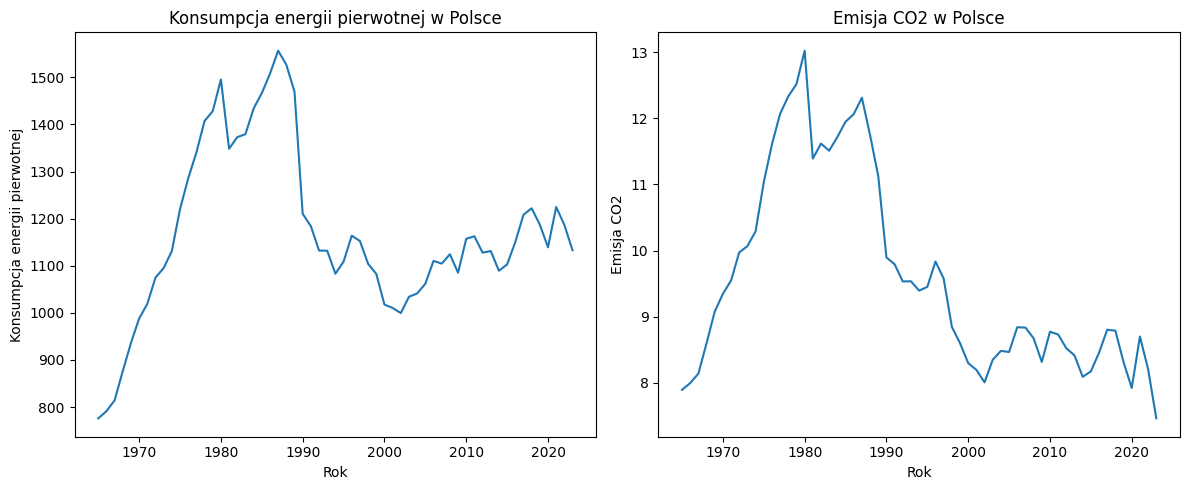

In [290]:
results_pl_energy = conn.execute("SELECT year, energy_consumption, co2_emissions FROM data WHERE country = 'Poland'").fetchall()
year, energy_consumption, co2_emission = zip(*results_pl_energy)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(year, energy_consumption)
axes[0].set_xlabel("Rok")
axes[0].set_ylabel("Konsumpcja energii pierwotnej")
axes[0].set_title("Konsumpcja energii pierwotnej w Polsce")

axes[1].plot(year, co2_emission)
axes[1].set_xlabel("Rok")
axes[1].set_ylabel("Emisja CO2")
axes[1].set_title("Emisja CO2 w Polsce")

plt.tight_layout()
plt.show()

Nachylenie (a): 0.006860767654286733
Wyraz wolny (b): 1.5674628034403355
Współczynnik korelacji (r): 0.8226420103731802
Wartość p: 1.335588569101193e-15
Błąd standardowy: 0.0006280590336318454


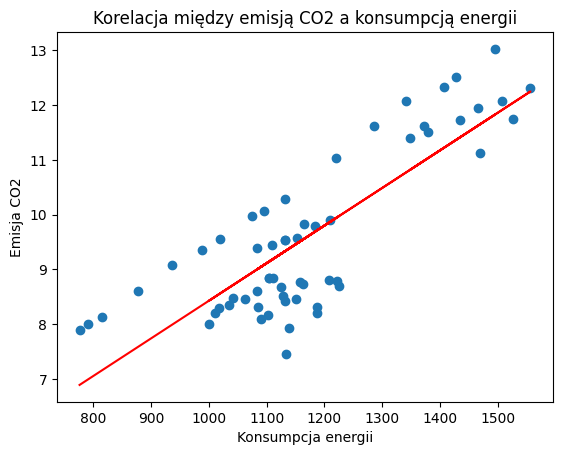

In [291]:
x = np.array(energy_consumption)
y = np.array(co2_emission)

a, b, r, p, std_err = stats.linregress(x, y)

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")
print(f"Współczynnik korelacji (r): {r}")
print(f"Wartość p: {p}")
print(f"Błąd standardowy: {std_err}")

plt.scatter(x, y)
plt.plot(x, a * x + b, color="red")
plt.xlabel("Konsumpcja energii")
plt.ylabel("Emisja CO2")
plt.title("Korelacja między emisją CO2 a konsumpcją energii")
plt.show()